# Working with Documents in Pixeltable

Pixeltable simplifies the processing and analysis of documents within your ML workloads. This guide demonstrates how to ingest, split, and interact with document data using the DocumentSplitter iterator.

## Setting Up Document Processing

Import Necessary Modules: Begin by importing pixeltable, pathlib, and the DocumentSplitter class:

In [1]:
%pip install -q pixeltable

In [2]:
import pixeltable as pxt
import pathlib
from pixeltable.iterators.document import DocumentSplitter

In [3]:
# Create the Pixeltable workspace
pxt.create_dir('document_example', ignore_errors=True)

Connected to Pixeltable database at: postgresql://postgres:@/pixeltable?host=/root/.pixeltable/pgdata


## Prepare Document Paths

Define a list of file paths to the documents you want to process. In this example, we're using sample PDF and HTML files from Pixeltable's test data directory:

In [4]:
# Import your own sample data in your local path
doc_paths = [
    pathlib.Path(pxt.__path__[0]) / '/content/sample_data/37-Million-Compilations.pdf',
    pathlib.Path(pxt.__path__[0]) / '/content/sample_data/2018-CppCon-Unwinding.pdf',
    pathlib.Path(pxt.__path__[0]) / '/content/sample_data/100G-Networking-Technology-Overview.pdf',
]

## Create Tables

- doc_table: You can create a table (doc_table) to store metadata about your documents, such as file names or other relevant attributes.
- doc_paragraphs: Pixeltable will create this table to store the extracted paragraph-level data.

Created table `doc_table`.
Inserting rows into `doc_table`: 3 rows [00:00, 576.22 rows/s]
Inserted 3 rows with 0 errors.


document
""
""
""

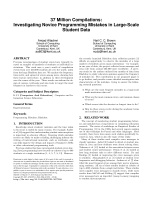
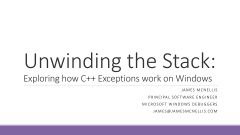
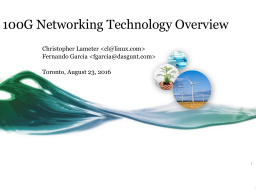

In [5]:
pxt.drop_table('doc_paragraphs', ignore_errors=True)  # Ensure table doesn't exist
pxt.drop_table('doc_table', ignore_errors=True)

doc_table = pxt.create_table('doc_table', {'document': pxt.DocumentType()})
doc_table.insert({'document': str(doc_path)} for doc_path in doc_paths)

doc_table.show()  # Display the table's contents

## Using the DocumentSplitter

Create a View with DocumentSplitter: The core of document processing involves creating a Pixeltable view that utilizes the DocumentSplitter iterator. This iterator breaks down the documents into paragraphs and extracts metadata:

In [6]:
paragraph_table = pxt.create_view(
    'doc_paragraphs',
    doc_table,
    iterator=DocumentSplitter.create(
        document=doc_table.document,
        separators='paragraph',  # Split by paragraphs
        metadata='page,bounding_box,heading'  # Extract metadata
    )
)

Inserting rows into `doc_paragraphs`: 2596 rows [00:02, 1026.41 rows/s]
Created view `doc_paragraphs` with 2596 rows, 0 exceptions.


## Explore and Analyze:

Display Paragraphs: The paragraph_table now contains each paragraph as a separate row along with its metadata.
Filter and Query: Utilize Pixeltable's powerful filtering and querying capabilities to explore specific paragraphs, search within the text, or perform other analyses.

pos,text,page,bounding_box,heading,document
0,37 Million Compilations:\nInvestigating Novice Programming Mistakes in Large-Scale\nStudent Data\n,0,"{'x1': 53.798004150390625, 'x2': 555.91650390625, 'y1': 68.27877044677734, 'y2': 130.65234375}",None,
1,"Amjad Altadmri\nSchool of Computing\nUniversity of Kent\nCanterbury, Kent, UK\naa803@kent.ac.uk\n",0,"{'x1': 142.07000732421875, 'x2': 241.69271850585938, 'y1': 155.01763916015625, 'y2': 213.086181640625}",None,
2,"Neil C. C. Brown\nSchool of Computing\nUniversity of Kent\nCanterbury, Kent, UK\nnccb@kent.ac.uk\n",0,"{'x1': 371.1390380859375, 'x2': 464.5284423828125, 'y1': 155.01763916015625, 'y2': 213.086181640625}",None,
3,ABSTRACT\n,0,"{'x1': 53.79803466796875, 'x2': 118.23656463623047, 'y1': 225.115966796875, 'y2': 240.669677734375}",None,
4,"Previous investigations of student errors have typically fo-\ncused on samples of hundreds of students at individual in-\nstitutions.\nThis work uses a year's worth of compilation\nevents from over 250,000 students all over the world, taken\nfrom the large Blackbox data set. We analyze the frequency,\ntime-to-fix, and spread of errors among users, showing how\nthese factors inter-relate, in addition to their development\nover the course of the year. These results can inform the de-\nsign of courses, textbooks and also tools to target the most\nfrequent (or hardest to fix) errors.\n",0,"{'x1': 53.79803466796875, 'x2': 292.9497985839844, 'y1': 244.31414794921875, 'y2': 347.42755126953125}",None,
5,Categories and Subject Descriptors\n,0,"{'x1': 53.79803466796875, 'x2': 234.09439086914062, 'y1': 358.51995849609375, 'y2': 374.07366943359375}",None,
6,K.3.2 [Computers And Education]: Computer and In-\nformation Science Education\n,0,"{'x1': 53.79803466796875, 'x2': 292.9109191894531, 'y1': 377.7181701660156, 'y2': 397.14556884765625}",None,
7,General Terms\n,0,"{'x1': 53.79803466796875, 'x2': 130.0602569580078, 'y1': 408.23797607421875, 'y2': 423.79168701171875}",None,
8,Experimentation\n,0,"{'x1': 53.79803466796875, 'x2': 121.20745086669922, 'y1': 427.4361877441406, 'y2': 436.402587890625}",None,
9,Keywords\n,0,"{'x1': 53.79803466796875, 'x2': 105.18148803710938, 'y1': 447.4949951171875, 'y2': 463.0487060546875}",None,

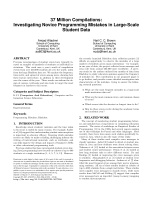
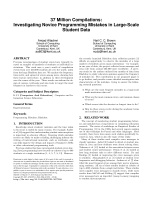
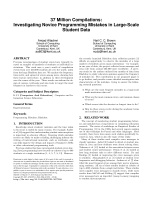
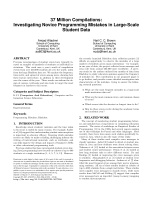
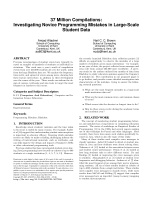
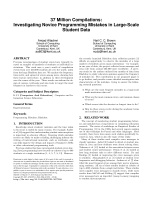
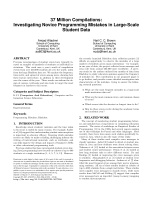
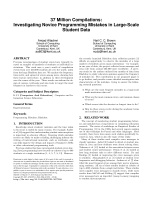
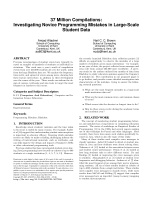
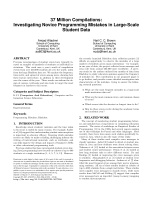
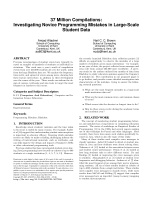
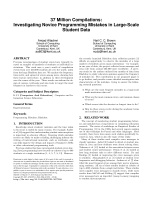
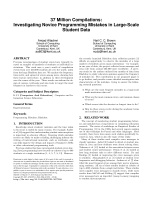
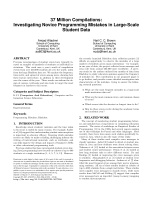
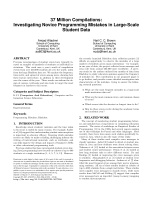
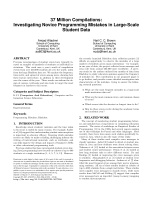
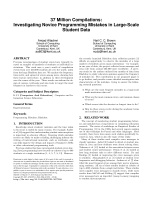
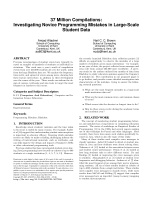
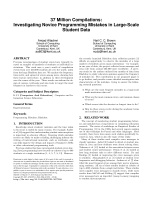
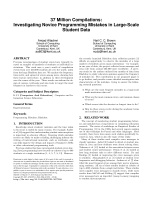

In [7]:
paragraph_table.show()  # Display the extracted paragraph data

# Key Considerations

- Supported File Types: Pixeltable currently supports PDF and HTML documents.
- Customizable Splitting: You can specify different separators in DocumentSplitter (e.g., "sentence", "line") based on your needs

## Advanced Features

Explore Pixeltable's documentation (e.g. [UDF](https://pixeltable.readme.io/docs/user-defined-functions-udfs) for incorporating your own more advanced document processing and chunking strategies.

Learn about RAG with Pixeltable: https://pixeltable.readme.io/docs/rag-operations